In [11]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale


In [13]:
#load the data
mushroom_data=pd.read_csv("Downloads/SVM/SVM/mushroom.csv")
#Exploratory Datasets
print("Total missing Values in the mushroom dataset:",mushroom_data.isna().sum().sum())
#find duplicates in  dataset
print("No.of duplicate in mushroom datasets:",end=" ")
print(mushroom_data.duplicated().sum()) 
mushroom_data=mushroom_data.drop_duplicates()
#check any duplicate in dataset after drop
print("No.of duplicate in datasets after drop:",end=" ")
print(mushroom_data.duplicated().sum())
#Select categorical data
print(mushroom_data["class"].value_counts())


Total missing Values in the mushroom dataset: 0
No.of duplicate in mushroom datasets: 1024
No.of duplicate in datasets after drop: 0
class
poisonous    618
edible       358
Name: count, dtype: int64


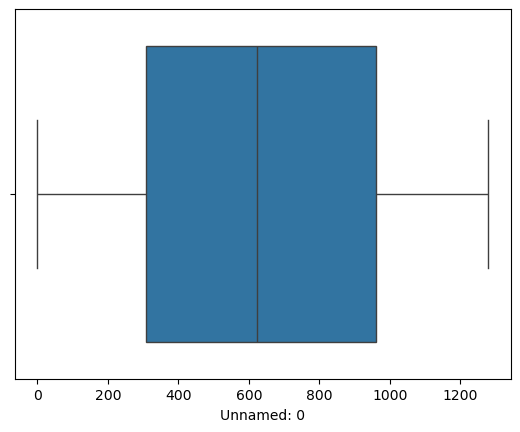

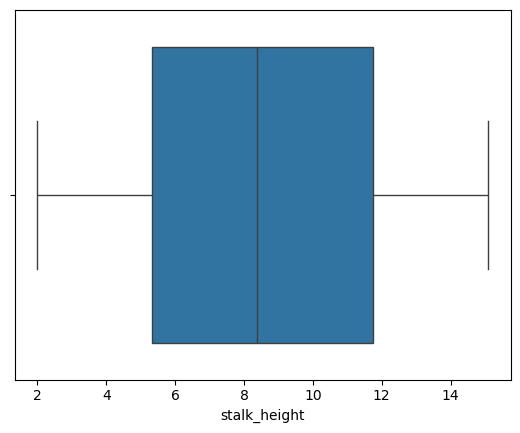

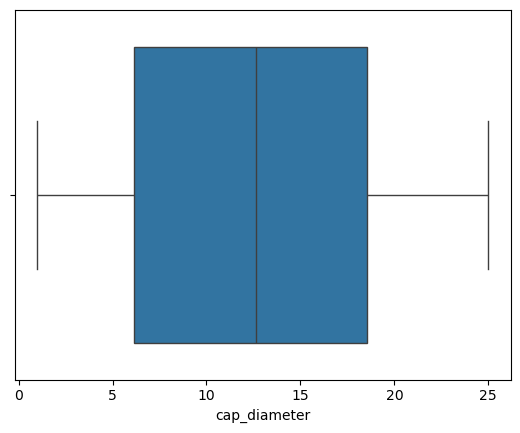

In [15]:
##Find outliers using boxplot for mushroom  dataset
for i in mushroom_data.select_dtypes(include="number").columns:
    sns.boxplot(data=mushroom_data,x=i)
    plt.show()

In [73]:
#summary data
print("The Five summary for data:\n")
print(mushroom_data.describe())

The Five summary for data:

        Unnamed: 0  stalk_height  cap_diameter
count   976.000000    976.000000    976.000000
mean    633.275615      8.524684     12.598566
std     372.262936      3.703043      6.987077
min       0.000000      2.000000      1.000000
25%     306.750000      5.326820      6.141161
50%     622.500000      8.367245     12.626094
75%     959.250000     11.758624     18.559780
max    1279.000000     15.095066     25.000054


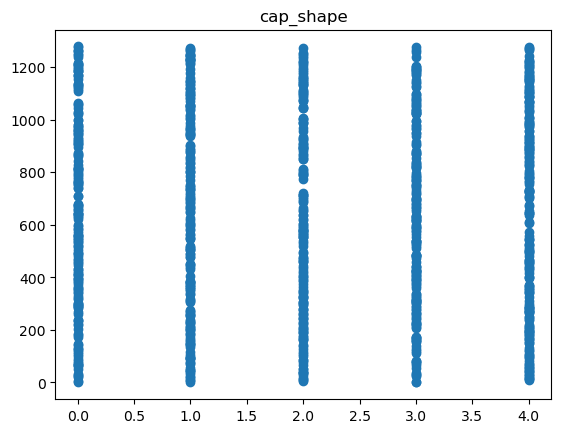

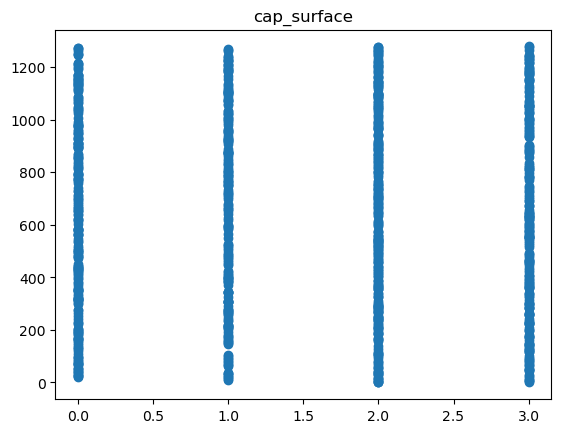

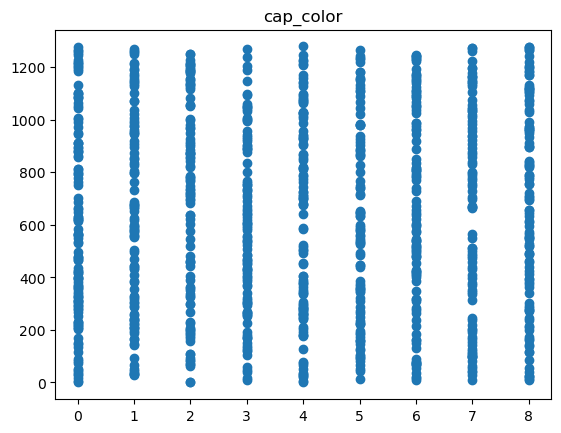

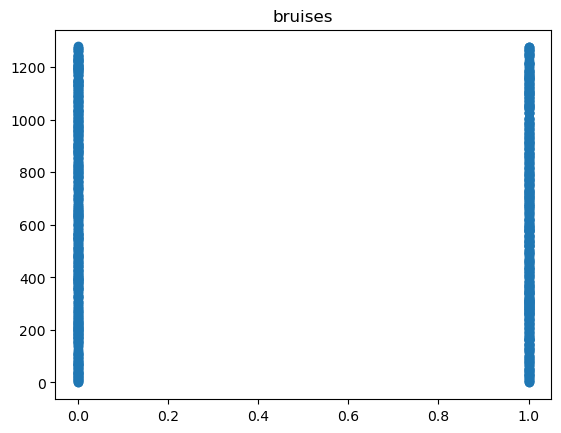

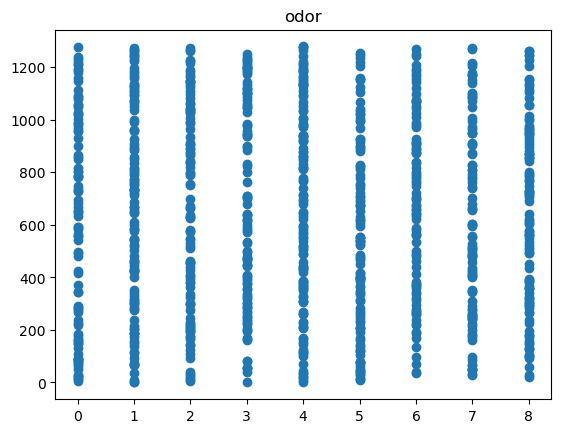

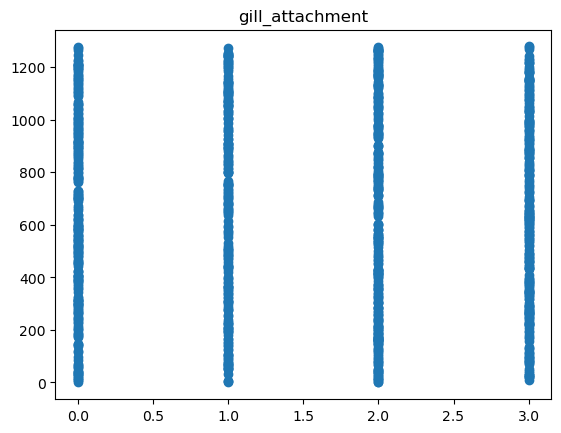

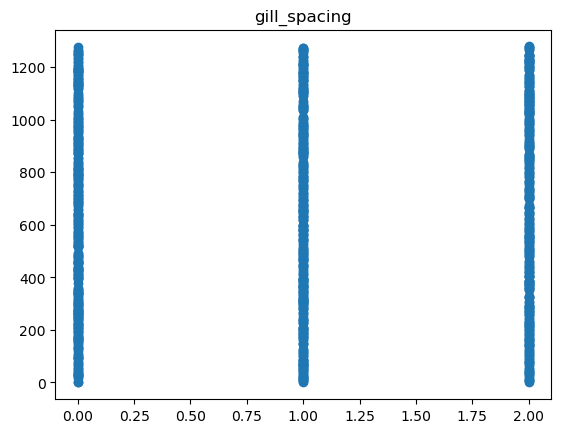

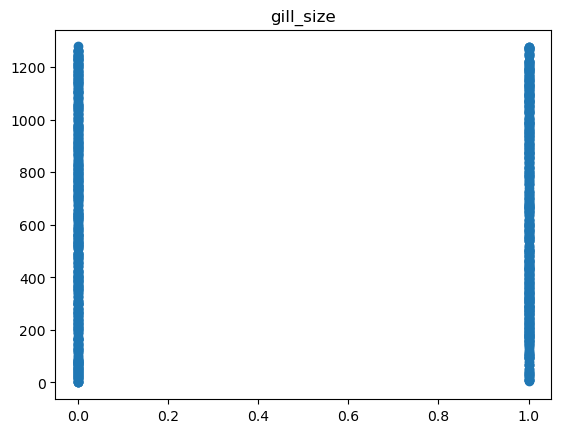

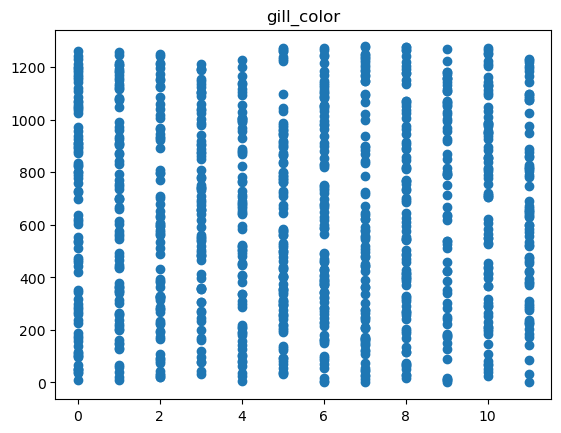

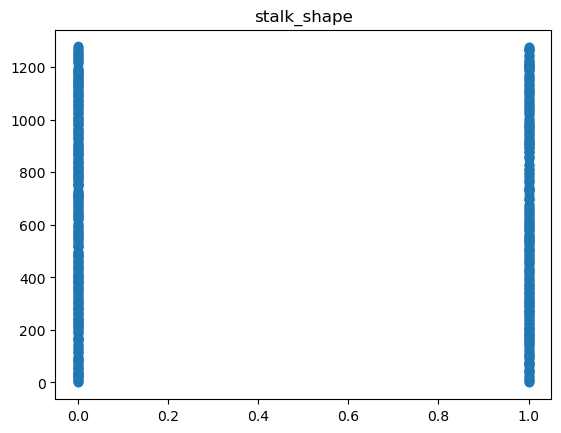

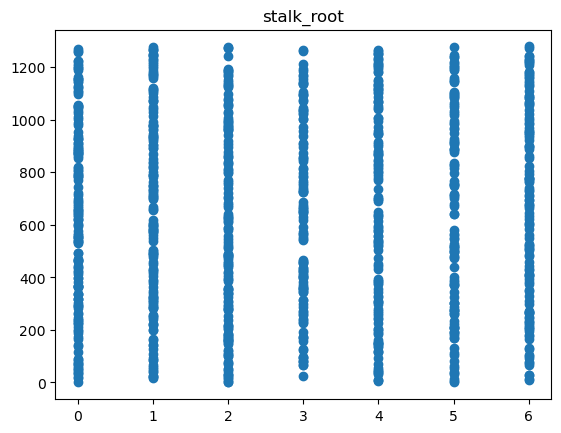

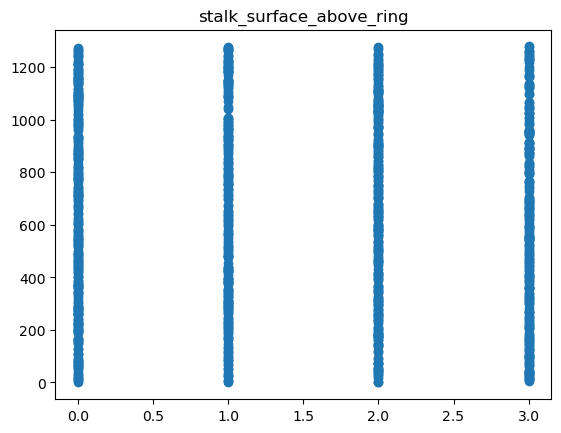

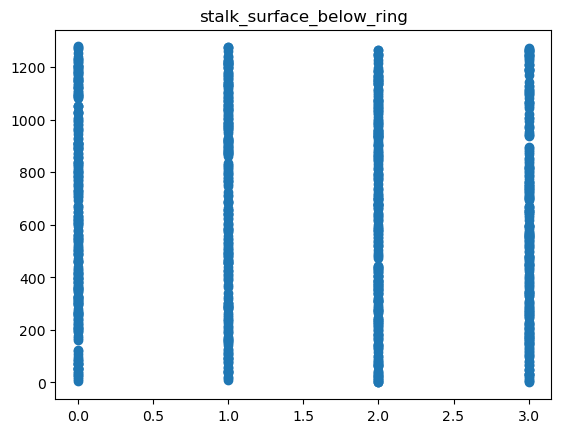

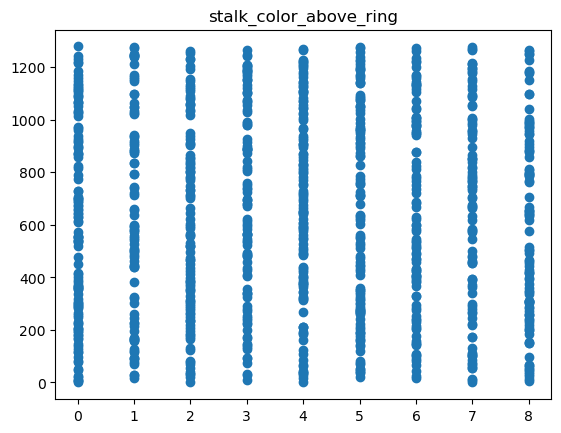

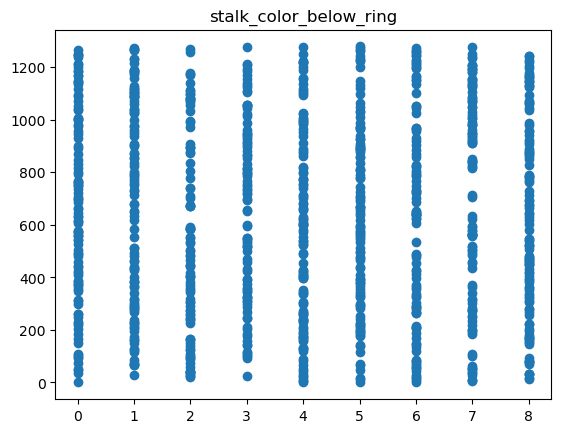

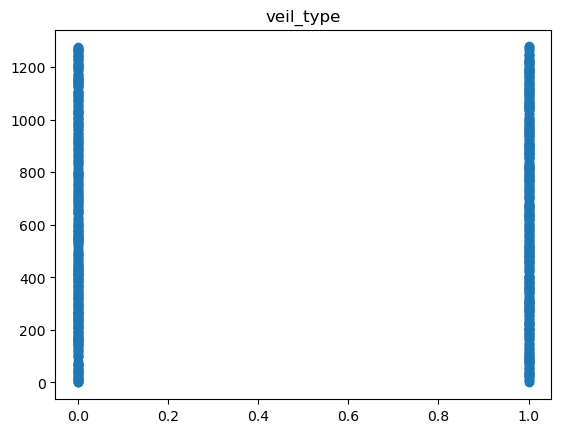

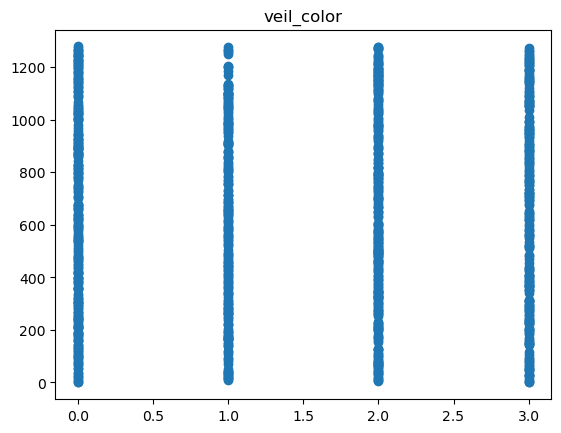

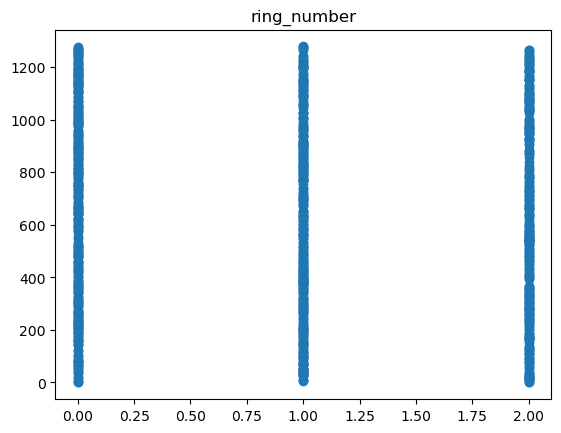

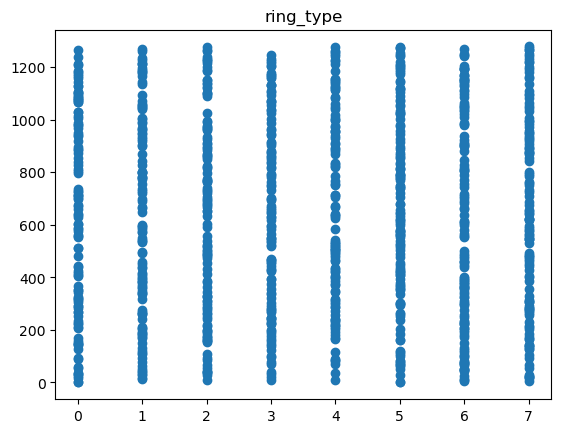

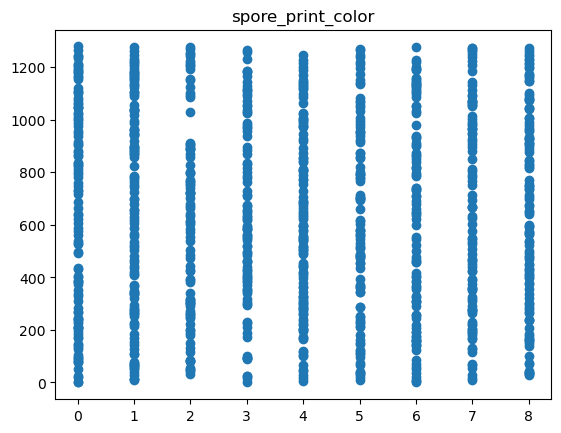

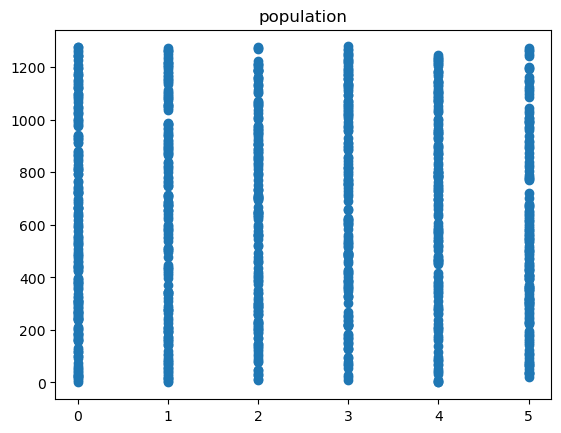

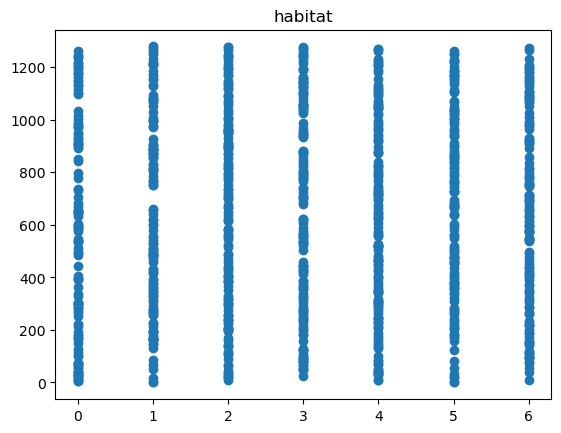

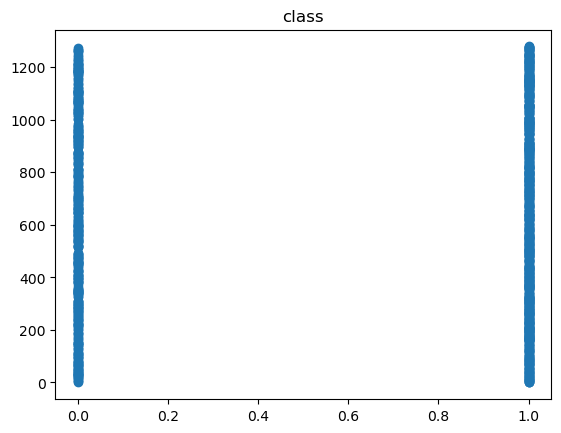

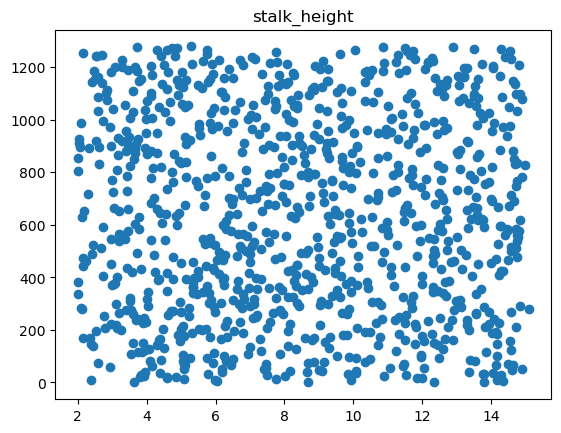

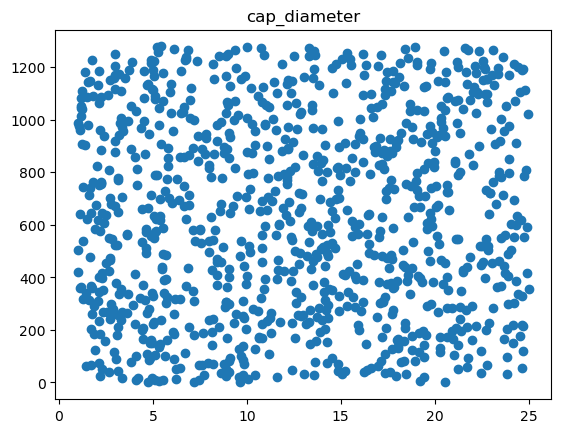

In [23]:
#plot scatterplot against numerical variable of mushroom data
mushroom_data=mushroom_data.rename(columns={"Unnamed: 0":"quantity"})
num=mushroom_data.select_dtypes(exclude=["object"])
for k in num:
    if k!="quantity":
        plt.scatter(mushroom_data[k],mushroom_data["quantity"])
        plt.title(k)
        plt.show()

<Axes: xlabel='population', ylabel='habitat'>

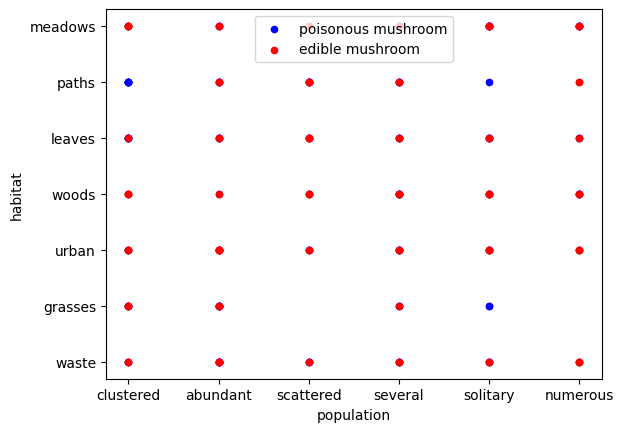

In [17]:
poisonous1=mushroom_data[mushroom_data["class"]=="poisonous"][0:100]
edible1=mushroom_data[mushroom_data["class"]=="edible"][0:100]
axes=poisonous1.plot(kind="scatter",x="population",y="habitat",color="blue",label="poisonous mushroom")
edible1.plot(kind="scatter",x="population",y="habitat",color="red",label="edible mushroom",ax=axes)


In [19]:
#Feature Engineering
#label encoding for categorical data
#convert the categorical variable into numerical variable for data
for i in mushroom_data.select_dtypes(include="object").columns:
    mushroom_data[i]=mushroom_data[i].astype('category')
    mushroom_data[i]=mushroom_data[i].cat.codes
print(mushroom_data.info())
print(mushroom_data.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                976 non-null    int64  
 1   cap_shape                 976 non-null    int8   
 2   cap_surface               976 non-null    int8   
 3   cap_color                 976 non-null    int8   
 4   bruises                   976 non-null    int8   
 5   odor                      976 non-null    int8   
 6   gill_attachment           976 non-null    int8   
 7   gill_spacing              976 non-null    int8   
 8   gill_size                 976 non-null    int8   
 9   gill_color                976 non-null    int8   
 10  stalk_shape               976 non-null    int8   
 11  stalk_root                976 non-null    int8   
 12  stalk_surface_above_ring  976 non-null    int8   
 13  stalk_surface_below_ring  976 non-null    int8   
 14  stalk_color_ab

In [21]:
#select the train and test data
x=mushroom_data[["class","habitat"]]
y=mushroom_data["population"]
feature=x.columns

In [23]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=25)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
print(x_train_scaled.shape)
print(x_test.shape)

(780, 2)
(196, 2)


In [27]:
model=svm.SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy on testing data is:",model.score(x_test,y_test))
print("Accuracy on training data is:",model.score(x_train,y_train))

Accuracy on testing data is: 0.15306122448979592
Accuracy on training data is: 0.21025641025641026


In [29]:
#performance for all kernel
from sklearn.metrics import classification_report
kernel=["linear","rbf","poly","sigmoid"]
for i in kernel:
    model=svm.SVC(kernel=i,C=1.0)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("For kernel:",i)
    print("classification report for:",i)
    print(classification_report(y_test,y_pred))
    print("Accuracy on testing data is:",model.score(x_test,y_test))
    print("Accuracy on training data is:",model.score(x_train,y_train))

For kernel: linear
classification report for: linear
              precision    recall  f1-score   support

           0       0.17      0.12      0.14        40
           1       0.14      0.76      0.23        25
           2       0.00      0.00      0.00        39
           3       0.00      0.00      0.00        35
           4       0.14      0.14      0.14        29
           5       0.00      0.00      0.00        28

    accuracy                           0.14       196
   macro avg       0.07      0.17      0.09       196
weighted avg       0.07      0.14      0.08       196

Accuracy on testing data is: 0.14285714285714285
Accuracy on training data is: 0.1935897435897436
For kernel: rbf
classification report for: rbf
              precision    recall  f1-score   support

           0       0.26      0.40      0.31        40
           1       0.10      0.48      0.17        25
           2       0.00      0.00      0.00        39
           3       0.00      0.00      0.0

C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

For kernel: sigmoid
classification report for: sigmoid
              precision    recall  f1-score   support

           0       0.18      0.42      0.26        40
           1       0.18      0.08      0.11        25
           2       0.00      0.00      0.00        39
           3       0.17      0.46      0.25        35
           4       0.00      0.00      0.00        29
           5       0.00      0.00      0.00        28

    accuracy                           0.18       196
   macro avg       0.09      0.16      0.10       196
weighted avg       0.09      0.18      0.11       196

Accuracy on testing data is: 0.17857142857142858
Accuracy on training data is: 0.17051282051282052


C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

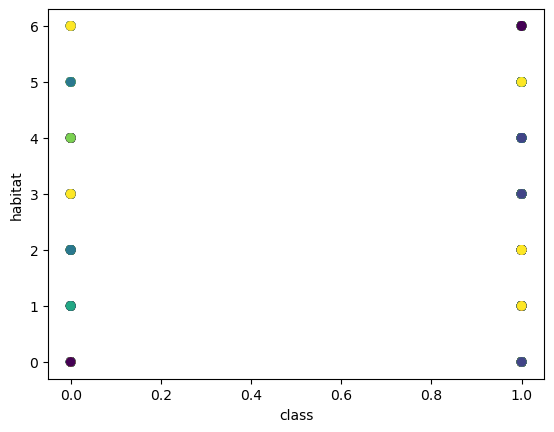

In [31]:
import matplotlib.pyplot as plt
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1],c=y_train)
plt.xlabel("class")
plt.ylabel("habitat")
plt.show()

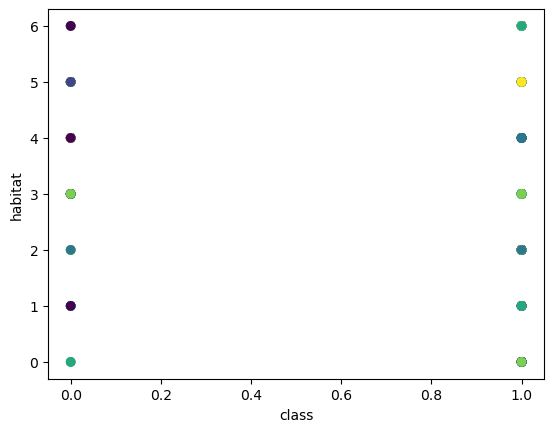

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test)
plt.xlabel("class")
plt.ylabel("habitat")
plt.show()

In [35]:
# get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (model.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1],c=y_train,cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

AttributeError: coef_ is only available when using a linear kernel